In [1]:
import numpy as np
import scipy as sci
import math
from scipy.optimize import curve_fit
from scipy.special import voigt_profile
import matplotlib.pyplot as plt 
import pandas as pd
import openpyxl

In [2]:
def weigh_linear_regresion(x,y,y_err):
    w = 1 / (y_err**2)
    sum_w, sum_wxy, sum_wx, sum_wy, sum_wx2 = np.sum(w), np.sum(w*x*y), np.sum(w*x), np.sum(w*y), np.sum(w*(x**2))
    delta = sum_w*sum_wx2 - (sum_wx**2)
    m = (sum_w*sum_wxy - sum_wx*sum_wy) / delta
    d_m = np.sqrt(sum_w/delta)
    b = (sum_wx2*sum_wy - sum_wx*sum_wxy) / delta
    d_b = np.sqrt(sum_wx2/delta)
    return (m,b),(d_m,d_b)

# Actividad 2

In [3]:
data_ = pd.read_excel("rayos_x_dos_actividades.xlsx",engine="openpyxl",sheet_name="Hoja2").to_numpy().T
angulos = data_[0]
data = []
for i in range(len(data_)):
    mod = i%2
    if mod != 0:
        data.append(data_[i].tolist())
data = np.array(data)
barreras = np.array([0.02,0.04,0.06,0.08,0.1])

incer_I = 1
n = 1
d = 0.2014 #nm
def bragg (d,theta,n):
    return 2/n* (d*np.sin(np.deg2rad(theta)))

def inc_bragg (d,theta,itheta,n):
    theta_=np.deg2rad(theta)
    itheta_=np.deg2rad(itheta)
    return np.abs(2/n* (d*np.cos(theta_)*itheta_))

data

array([[369, 305, 226, 169, 136, 135, 142, 154, 158, 162, 184],
       [307, 242, 178, 132, 105, 104, 111, 116, 124, 124, 138],
       [260, 205, 151, 116,  92,  93,  96, 105, 107, 106, 105],
       [229, 178, 133, 104,  84,  85,  89,  96,  99,  99, 105],
       [205, 157, 117,  93,  77,  79,  85,  88,  89,  89,  94],
       [192, 147, 108,  87,  73,  76,  80,  85,  87,  85,  89],
       [139, 109,  80,  59,  47,  47,  47,  47,  46,  46,  51],
       [ 68,  51,  38,  30,  26,  27,  26,  25,  25,  24,  25],
       [ 40,  27,  21,  16,  15,  16,  15,  15,  14,  14,  13],
       [ 14,   9,   8,   7,   6,   6,   6,   6,   5,   5,   5]])

Aluminio

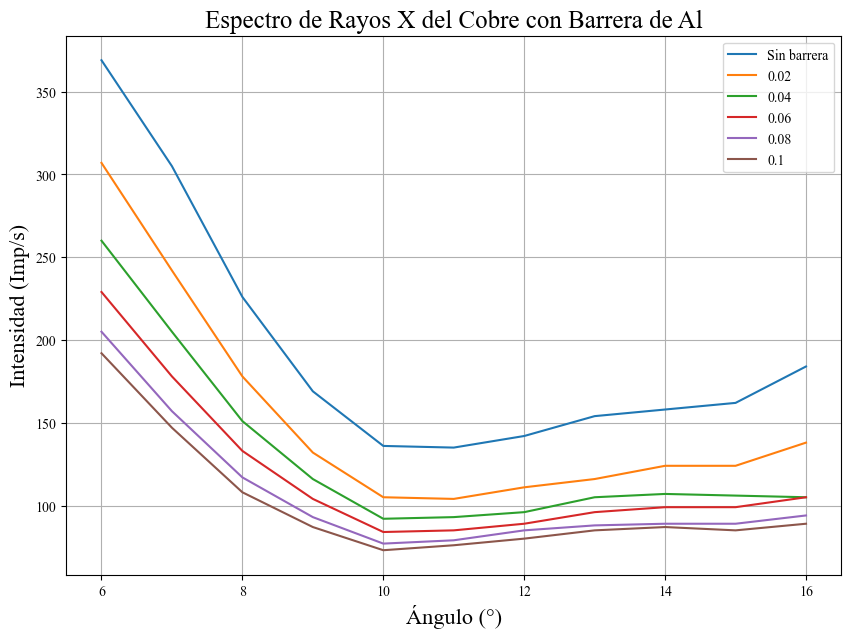

In [4]:
plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
plt.plot(angulos,data[0],label='Sin barrera')
for i in range(len(barreras)):
    plt.plot(angulos,data[i+1],label=str(barreras[i]))
plt.ylabel("Intensidad (Imp/s)", fontsize=16)
plt.title("Espectro de Rayos X del Cobre con Barrera de Al", fontsize=18)
plt.xlabel("Ángulo (°)",fontsize=16)
plt.grid(True)
plt.legend()

In [5]:
lambdas = bragg(d,angulos,n)
lambdas

array([0.04210407, 0.04908897, 0.05605893, 0.0630118 , 0.06994549,
       0.07685786, 0.08374683, 0.09061028, 0.09744614, 0.10425231,
       0.11102673])

In [6]:
data_Al = data[1:len(barreras) + 1].T
data_Al

array([[307, 260, 229, 205, 192],
       [242, 205, 178, 157, 147],
       [178, 151, 133, 117, 108],
       [132, 116, 104,  93,  87],
       [105,  92,  84,  77,  73],
       [104,  93,  85,  79,  76],
       [111,  96,  89,  85,  80],
       [116, 105,  96,  88,  85],
       [124, 107,  99,  89,  87],
       [124, 106,  99,  89,  85],
       [138, 105, 105,  94,  89]])

In [7]:
I0 = data[0]
I0

array([369, 305, 226, 169, 136, 135, 142, 154, 158, 162, 184])

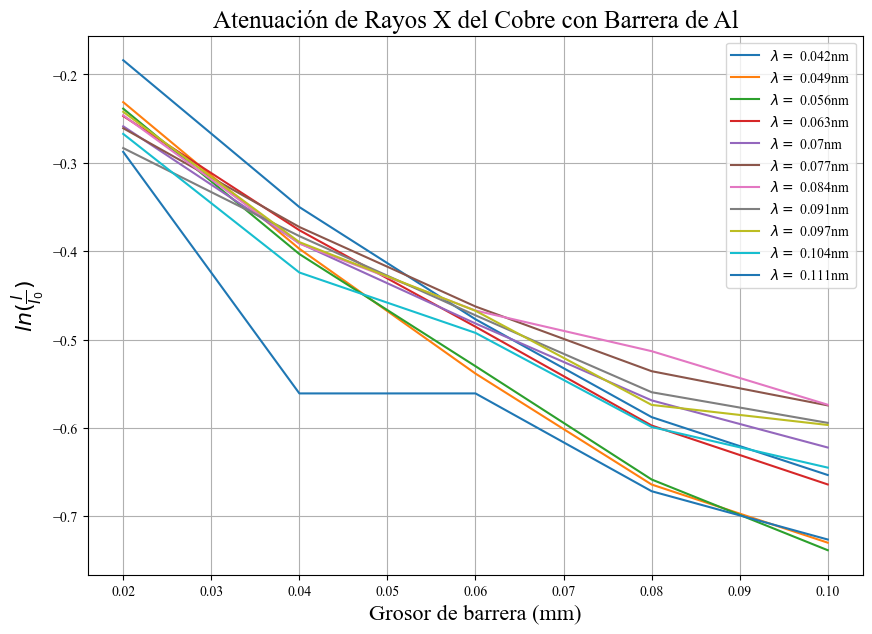

In [8]:
miu = np.zeros(len(lambdas))
incer_miu = np.zeros(len(lambdas))

plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
for i in range(len(data_Al)):
    y = np.log(data_Al[i]/I0[i])
    incer_y = (I0[i]/data_Al[i])*np.sqrt(incer_I**2 + (incer_I/(I0[i]**2))**2)
    coef,cov = np.polyfit(barreras,y, 1, cov=True)
    miu[i] = coef[0]
    incer_miu[i] = np.sqrt(cov[0, 0])
    plt.plot(barreras,y,label= r'$\lambda=$' + ' ' + str(round(lambdas[i],3)) + 'nm')
plt.ylabel(r'$ln(\frac{I}{I_0})$', fontsize=16)
plt.title("Atenuación de Rayos X del Cobre con Barrera de Al", fontsize=18)
plt.xlabel("Grosor de barrera (mm)",fontsize=16)
plt.grid(True)
plt.legend()

In [9]:
miu *= -1
miu

array([5.88188201, 6.31887226, 6.27205274, 5.27389153, 4.52492487,
       3.95233379, 3.88352034, 3.99250702, 4.46469679, 4.65031671,
       4.93950099])

In [10]:
incer_miu

array([0.5340625 , 0.53951353, 0.42136053, 0.31682133, 0.40159079,
       0.39988239, 0.54251633, 0.35112436, 0.58696312, 0.51724349,
       1.17869982])

Text(0, 0.5, 'Residual')

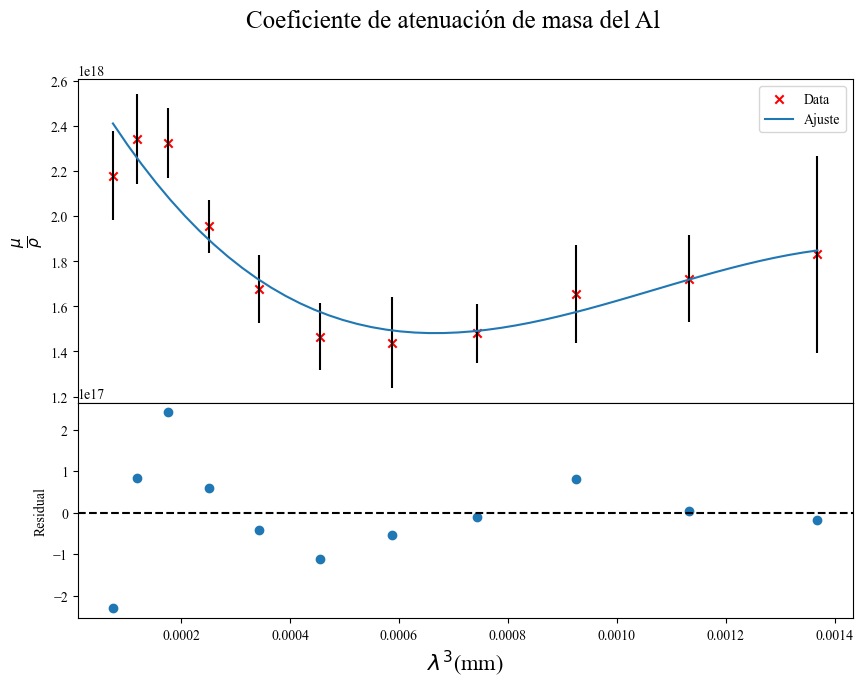

In [11]:
rho_Al = 2698*1e-9 #Kg/mm3
Z_Al = 13
y = (miu/rho_Al) * 1e12 #nm2/Kg
x = lambdas**3
x_ = np.linspace(x[0],x[-1])
coef,cov = np.polyfit(x,y,3,cov=True)
model = np.poly1d(coef)
incer_y = np.abs((incer_miu/rho_Al)*1e12)
plt.rc('font', family='Times New Roman') 

fig, axs = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle("Coeficiente de atenuación de masa del Al", fontsize=18)

axs[0].scatter(x,y,marker='x',color='r',label='Data')
axs[0].errorbar(x,y,yerr= incer_y, fmt='none', ecolor='black')
axs[0].plot(x_,model(x_),label='Ajuste')
axs[0].set_ylabel(r'$\frac{\mu}{\rho}$', fontsize=16)
#axs[0].text(0.184,0.00152,'m = (109e-04 $\pm$ 2e-04)\nb = (0.6e-05 $\pm$ 2.8e-05)\n$R^{2} = 0.973$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(x,y - model(x))
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel(r'$\lambda^{3}$' + "(mm)",fontsize=16)
axs[1].set_ylabel('Residual')
#axs[1].set_ylim(-6.,7.5)
#axs[1].set_yticks(np.arange(-4.5, 7., 1.5))

In [12]:
coef

array([-1.47607531e+27,  4.73172870e+24, -4.34024675e+21,  2.70923376e+18])

In [13]:
coef_err = np.sqrt(np.diagonal(cov))
coef_err

array([8.64777542e+26, 1.86161859e+24, 1.11009999e+21, 1.65322526e+17])

Zinc

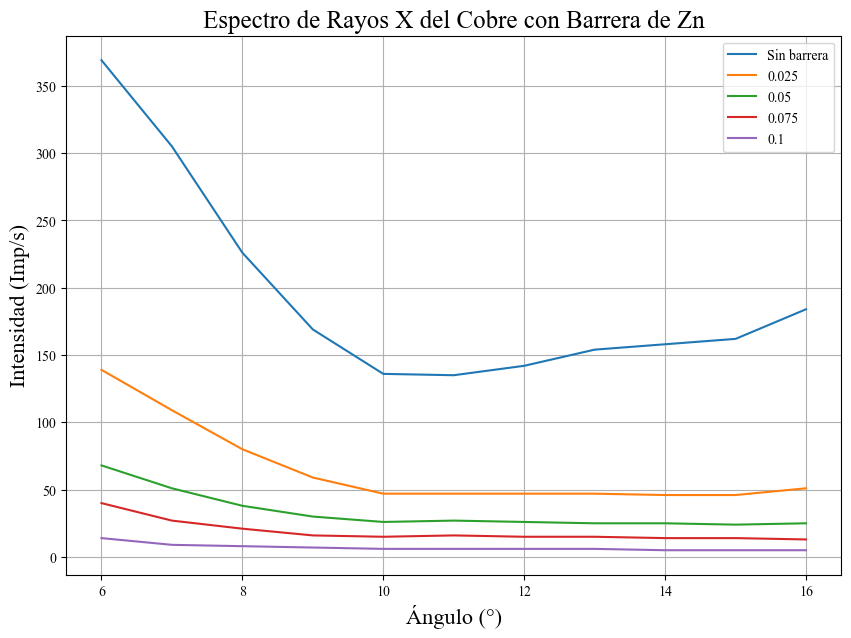

In [14]:
barreras = np.array([0.025,0.05,0.075,0.1])

plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
plt.plot(angulos,data[0],label='Sin barrera')
for i in range(len(barreras)):
    plt.plot(angulos,data[i+6],label=str(barreras[i]))
plt.ylabel("Intensidad (Imp/s)", fontsize=16)
plt.title("Espectro de Rayos X del Cobre con Barrera de Zn", fontsize=18)
plt.xlabel("Ángulo (°)",fontsize=16)
plt.grid(True)
plt.legend()

In [15]:
data_Zn = data[6:].T
data_Zn

array([[139,  68,  40,  14],
       [109,  51,  27,   9],
       [ 80,  38,  21,   8],
       [ 59,  30,  16,   7],
       [ 47,  26,  15,   6],
       [ 47,  27,  16,   6],
       [ 47,  26,  15,   6],
       [ 47,  25,  15,   6],
       [ 46,  25,  14,   5],
       [ 46,  24,  14,   5],
       [ 51,  25,  13,   5]])

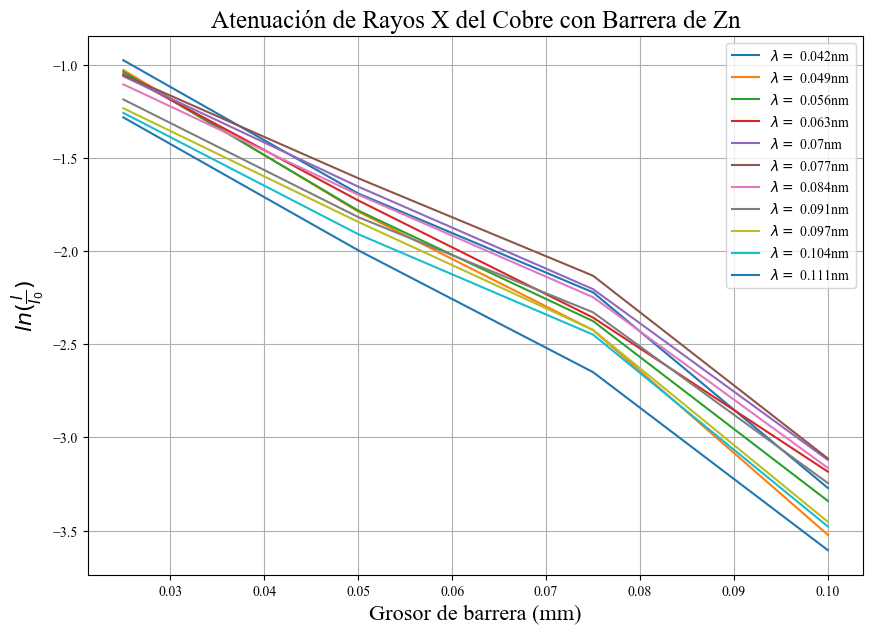

In [16]:
miu = np.zeros(len(lambdas))
incer_miu = np.zeros(len(lambdas))

plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
for i in range(len(data_Zn)):
    y = np.log(data_Zn[i]/I0[i])
    incer_y = (I0[i]/data_Zn[i])*np.sqrt(incer_I**2 + (incer_I/(I0[i]**2))**2)
    coef,cov = np.polyfit(barreras,y, 1, cov=True)
    miu[i] = coef[0]
    incer_miu[i] = np.sqrt(cov[0, 0])
    plt.plot(barreras,y,label= r'$\lambda=$' + ' ' + str(round(lambdas[i],3)) + 'nm')
plt.ylabel(r'$ln(\frac{I}{I_0})$', fontsize=16)
plt.title("Atenuación de Rayos X del Cobre con Barrera de Zn", fontsize=18)
plt.xlabel("Grosor de barrera (mm)",fontsize=16)
plt.grid(True)
plt.legend()
    

In [17]:
miu *= -1
miu

array([29.66751225, 32.47343473, 30.003276  , 28.09396218, 26.90084294,
       26.79365016, 26.90084294, 26.74396008, 28.94971579, 28.78642781,
       30.48435851])

In [18]:
incer_miu

array([2.90599301, 2.71070516, 2.03440838, 1.17788497, 2.35342161,
       3.03099046, 2.35342161, 2.3371122 , 2.98200523, 2.94073107,
       1.8422141 ])

Text(0, 0.5, 'Residual')

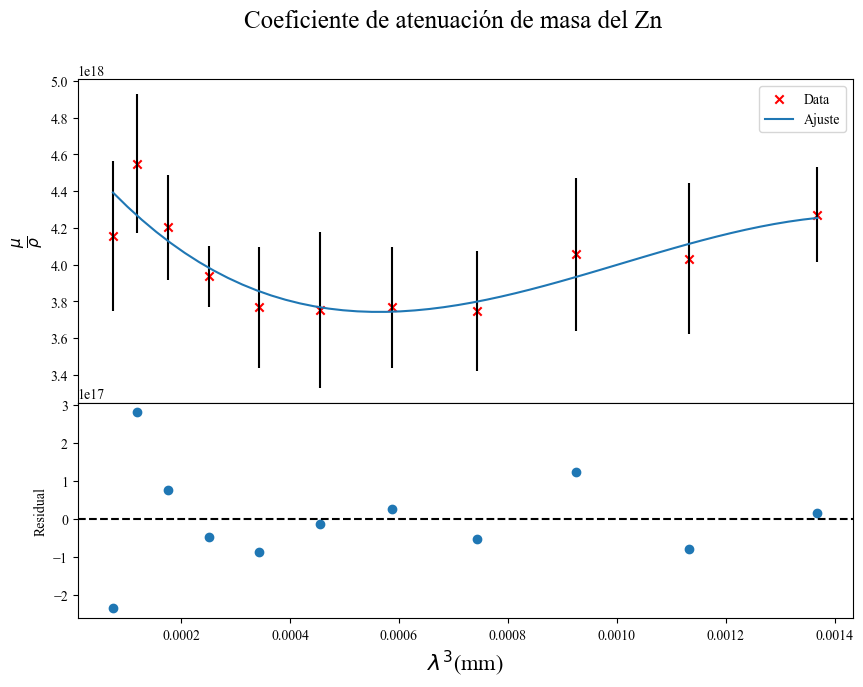

In [19]:
rho_Zn = 7138*1e-9 #Kg/mm3
Z_Zn = 30

y = (miu/rho_Zn) * 1e12 #nm2/Kg
coef,cov = np.polyfit(x,y,3,cov=True)
model = np.poly1d(coef)
incer_y = np.abs((incer_miu/rho_Zn)*1e12)
plt.rc('font', family='Times New Roman') 

fig, axs = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)
fig.suptitle("Coeficiente de atenuación de masa del Zn", fontsize=18)

axs[0].scatter(x,y,marker='x',color='r',label='Data')
axs[0].errorbar(x,y,yerr= incer_y, fmt='none', ecolor='black')
axs[0].plot(x_,model(x_),label='Ajuste')
axs[0].set_ylabel(r'$\frac{\mu}{\rho}$', fontsize=16)
#axs[0].text(0.184,0.00152,'m = (109e-04 $\pm$ 2e-04)\nb = (0.6e-05 $\pm$ 2.8e-05)\n$R^{2} = 0.973$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(x,y - model(x))
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel(r'$\lambda^{3}$' + "(mm)",fontsize=16)
axs[1].set_ylabel('Residual')
#axs[1].set_ylim(-6.,7.5)
#axs[1].set_yticks(np.arange(-4.5, 7., 1.5))

In [20]:
coef

array([-1.49631124e+27,  4.52138462e+24, -3.66842115e+21,  4.64194944e+18])

In [21]:
coef_err = np.sqrt(np.diagonal(cov))
coef_err

array([9.49844324e+26, 2.04474303e+24, 1.21929875e+21, 1.81585038e+17])

# Actividad 4

In [22]:
data = pd.read_excel("rayos_x_dos_actividades.xlsx",engine="openpyxl",sheet_name="Hoja5").to_numpy().T
data

array([[10. , 10.1, 10.2, ..., 20.8, 20.9, 21. ],
       [ 0. ,  1. ,  0. , ...,  1. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. , ...,  1. ,  0. ,  2. ],
       ...,
       [ 5. ,  6. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ]])

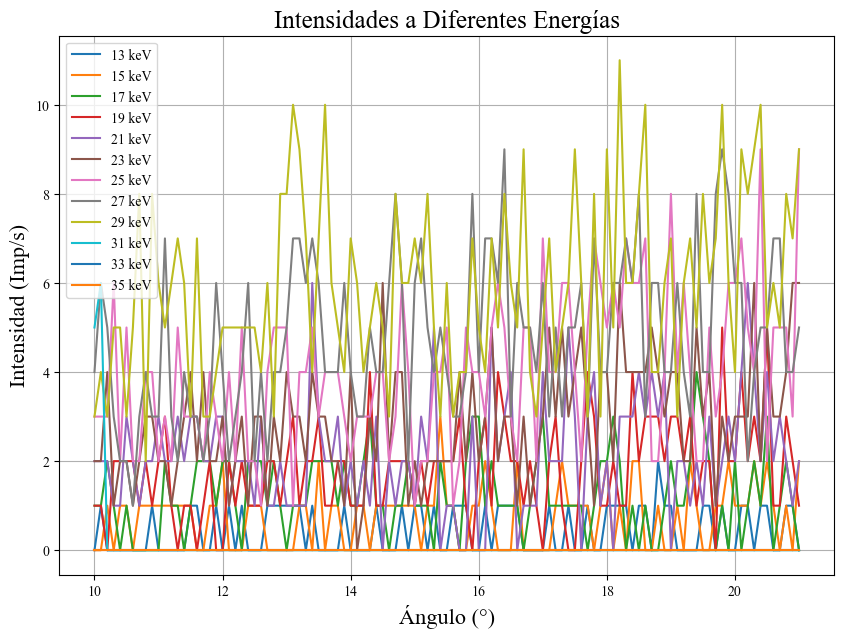

In [23]:
angulos = data[0]
energia = np.array([13,15,17,19,21,23,25,27,29,31,33,35])
plt.rc('font', family='Times New Roman') 
plt.figure(figsize = (10, 7))
for i in range(len(energia)):
    plt.plot(angulos,data[i+1],label=str(energia[i])+" keV")
plt.ylabel("Intensidad (Imp/s)", fontsize=16)
plt.title("Intensidades a Diferentes Energías", fontsize=18)
plt.xlabel("Ángulo (°)",fontsize=16)
plt.grid(True)
plt.legend()